In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
! nvidia-smi

Mon Aug  8 19:11:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 25%   33C    P8    20W / 260W |     19MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 24%   

# Scattor plot

AGR：Relative Patent Growth (y軸)  
Relative Technology Share (x軸)

In [4]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

## DE

In [5]:
cpc=["T2\n-Remote control systems","T10","T3","T12","T9","T11","T7","T4","T5","T1\n-Sensors"]
y = [38.03,53.66,16.39,-6.40,69.46,76.16,62.23,89.04,46.13,138.33]
x = [0.175586854,0.128638498,0.050704225,0.077934272,0.049765258,0.099530516,0.078873239,0.120187793,0.068544601,0.063849765]

In [6]:
y=NormalizeData(y)
x=NormalizeData(x)

In [7]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Growth')

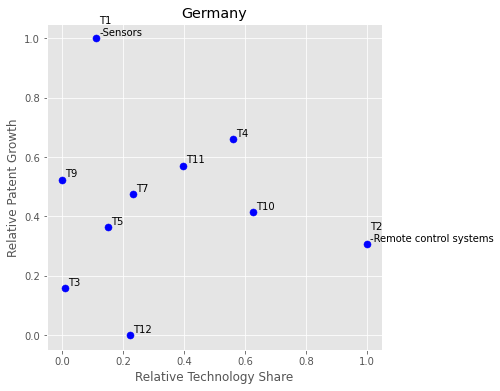

In [8]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')
    
plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    plt.text(x[i]+0.01, y[i]+0.01,txt)
    

# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')

plt.title('Germany')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Growth')

## CN

In [9]:
cpc=["T6","T7","T4","T1","T2\n-Remote control systems ","T0\n-Signal processing ","T3","T5","T8","T9"]
y=[38.09,59.09,24.92,35.04,119.59,76.88,73.97,63.46,57.77,75.13]
x=[0.019292693,0.132847117,0.007458373,0.026255676,0.015274529,0.500921976,0.14473648,0.073427824,0.064620889,0.015164442]

In [10]:
y=NormalizeData(y)
x=NormalizeData(x)

In [11]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Growth')

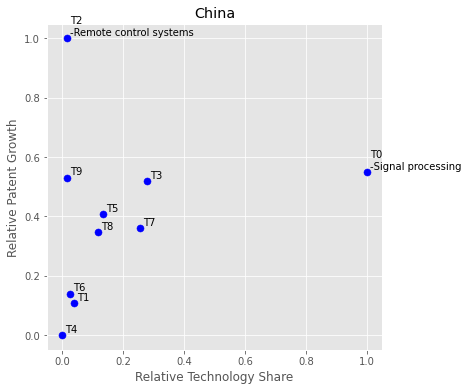

In [12]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')
    
plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    plt.text(x[i]+0.01, y[i]+0.01,txt)
    
# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')

plt.title('China')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Growth')

## US

In [13]:
cpc=["T0\n-Signal processing","T9\n-Wireless communication networks","T10","T2","T5","T1","T12","T3","T14","T15"]
y=[168,238,109,68,192,157,156,89,144,95]
x=[0.18539791,0.096165787,0.052752768,0.08576529,0.054330953,0.050346683,0.073760737,0.071535755,0.059582945,0.051329815]

In [14]:
y=NormalizeData(y)
x=NormalizeData(x)

In [15]:
y_1 = np.percentile(y, 33) 
y_2 = np.percentile(y, 66) 
x_1 = np.percentile(x, 33) 
x_2 = np.percentile(x, 66) 

Text(0, 0.5, 'Relative Patent Growth')

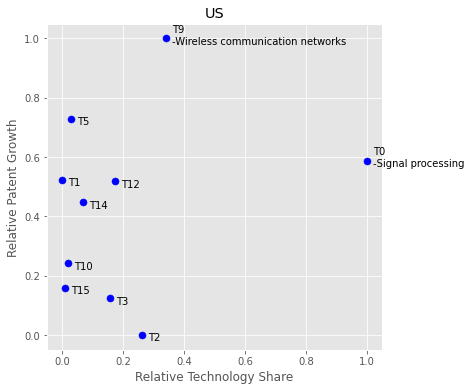

In [16]:
plt.figure(figsize=(6,6))

plt.style.use('ggplot')


plt.scatter(x, y, c ="blue",s = 50)

for i, txt in enumerate(cpc):
    plt.text(x[i]+0.02, y[i]-0.02,txt)

# plt.axhline(y_1, color = 'red')
# plt.axhline(y_2, color = 'red')
# plt.axvline(x_1, color = 'red')
# plt.axvline(x_2, color = 'red')



plt.title('US')
plt.xlabel('Relative Technology Share')
plt.ylabel('Relative Patent Growth')